In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf

# Load the dataset
data_path = 'combined_data_zero_sentiment.csv'
data = pd.read_csv(data_path)

# Drop rows with missing Ethereum data and the 'Tweet' column
data.dropna(subset=['Open_ETH', 'High_ETH', 'Low_ETH', 'Close_ETH', 'Adj Close_ETH', 'Volume_ETH'], inplace=True)
data.drop(columns=['Tweet'], inplace=True)

# Feature Engineering
data['BTC_Daily_Change'] = data['Close'] - data['Open']
data['ETH_Daily_Change'] = data['Close_ETH'] - data['Open_ETH']

# Selecting features and target variable
X = data.drop(columns=['Date', 'Close_ETH', 'Adj Close_ETH'])
y = data['Close_ETH'].values

# Scaling the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshaping the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Building the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Transforming the scaled data back to original scale
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train = scaler_y.inverse_transform(y_train)
y_test = scaler_y.inverse_transform(y_test)

# Calculating RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")


Epoch 1/50
23/23 [==============================] - 4s 18ms/step - loss: 0.0389
Epoch 2/50
23/23 [==============================] - 0s 18ms/step - loss: 0.0069
Epoch 3/50
23/23 [==============================] - 0s 18ms/step - loss: 0.0050
Epoch 4/50
23/23 [==============================] - 0s 17ms/step - loss: 0.0045
Epoch 5/50
23/23 [==============================] - 0s 18ms/step - loss: 0.0041
Epoch 6/50
23/23 [==============================] - 0s 20ms/step - loss: 0.0037
Epoch 7/50
23/23 [==============================] - 1s 23ms/step - loss: 0.0030
Epoch 8/50
23/23 [==============================] - 1s 23ms/step - loss: 0.0022
Epoch 9/50
23/23 [==============================] - 1s 22ms/step - loss: 0.0017
Epoch 10/50
23/23 [==============================] - 1s 23ms/step - loss: 0.0016
Epoch 11/50
23/23 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 12/50
23/23 [==============================] - 1s 22ms/step - loss: 0.0016
Epoch 13/50
23/23 [==================

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf

# Load the training dataset
data_path_train = 'combined_data_zero_sentiment.csv'
data_train = pd.read_csv(data_path_train)

# Load the testing dataset
data_path_test = 'combined_data_2023.csv'
data_test = pd.read_csv(data_path_test)

# Drop rows with missing Ethereum data
data_train.dropna(subset=['Open_ETH', 'High_ETH', 'Low_ETH', 'Close_ETH', 'Adj Close_ETH', 'Volume_ETH'], inplace=True)
data_test.dropna(subset=['Open_ETH', 'High_ETH', 'Low_ETH', 'Close_ETH', 'Adj Close_ETH', 'Volume_ETH'], inplace=True)

# Feature Engineering for training data
data_train['BTC_Daily_Change'] = data_train['Close'] - data_train['Open']
data_train['ETH_Daily_Change'] = data_train['Close_ETH'] - data_train['Open_ETH']

# Feature Engineering for testing data
data_test['BTC_Daily_Change'] = data_test['Close'] - data_test['Open']
data_test['ETH_Daily_Change'] = data_test['Close_ETH'] - data_test['Open_ETH']

# Selecting features and target variable
X_train = data_train.drop(columns=['Date','Tweet', 'Close_ETH', 'Adj Close_ETH'])
y_train = data_train['Close_ETH'].values

X_test = data_test.drop(columns=['Date','Tweet', 'Close_ETH', 'Adj Close_ETH'])
y_test = data_test['Close_ETH'].values

# Scaling the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape for LSTM
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train
model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=64)

# Predict
y_train_pred_scaled = model.predict(X_train_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)

# Inverse transform
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


Epoch 1/50
29/29 [==============================] - 6s 13ms/step - loss: 0.0256
Epoch 2/50
29/29 [==============================] - 0s 14ms/step - loss: 0.0057
Epoch 3/50
29/29 [==============================] - 0s 16ms/step - loss: 0.0050
Epoch 4/50
29/29 [==============================] - 0s 15ms/step - loss: 0.0044
Epoch 5/50
29/29 [==============================] - 0s 14ms/step - loss: 0.0040
Epoch 6/50
29/29 [==============================] - 0s 13ms/step - loss: 0.0032
Epoch 7/50
29/29 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 8/50
29/29 [==============================] - 0s 13ms/step - loss: 0.0019
Epoch 9/50
29/29 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 10/50
29/29 [==============================] - 0s 16ms/step - loss: 0.0017
Epoch 11/50
29/29 [==============================] - 0s 14ms/step - loss: 0.0015
Epoch 12/50
29/29 [==============================] - 0s 16ms/step - loss: 0.0016
Epoch 13/50
29/29 [==================

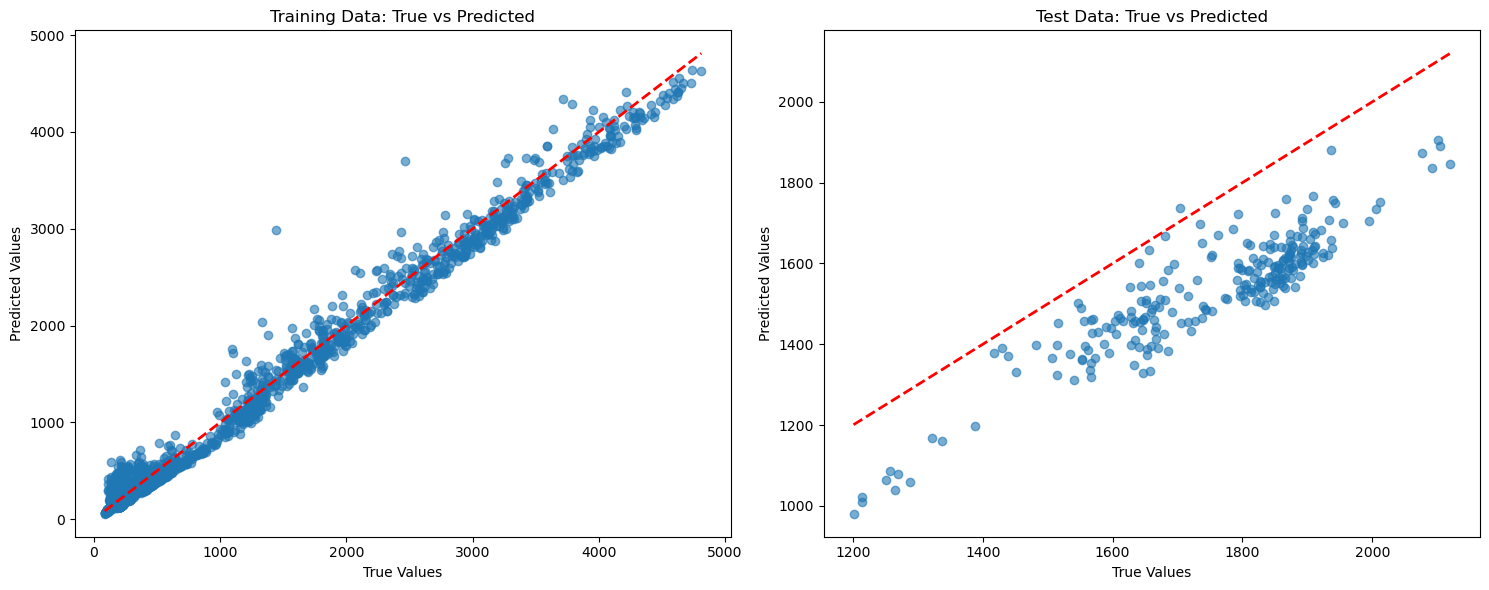

In [12]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(15, 6))

# Plotting the training predictions
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', lw=2, color='r')
plt.title('Training Data: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Plotting the test predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=2, color='r')
plt.title('Test Data: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


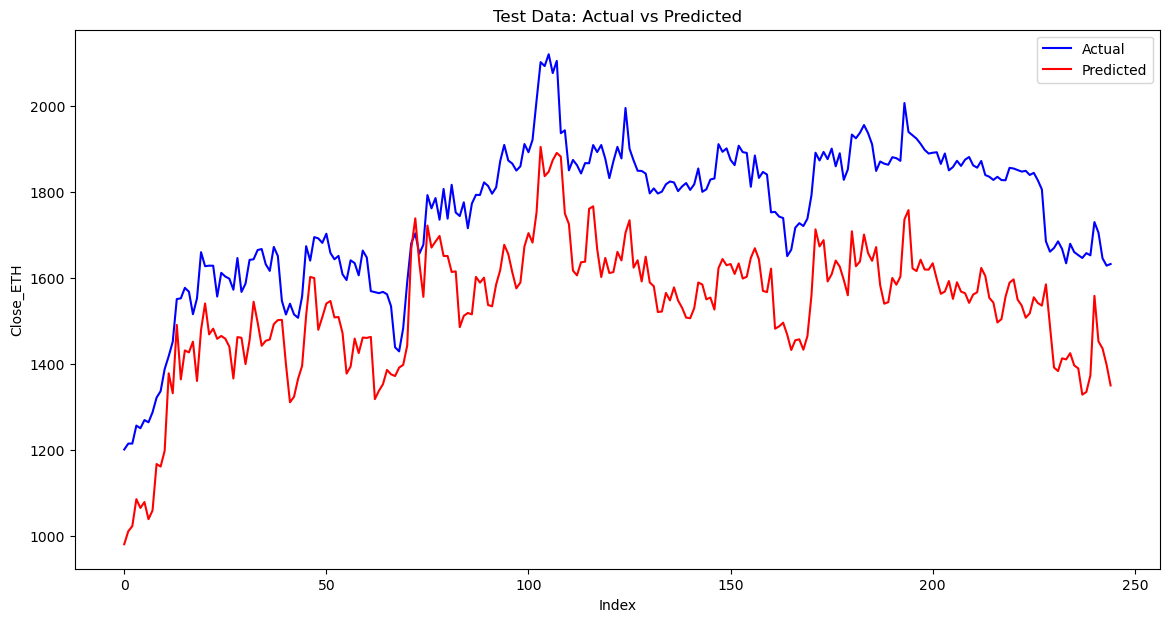

In [13]:
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(14, 7))

# Plotting the actual and predicted values for the test data
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='red')

plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Close_ETH')
plt.legend()

# Show the plot
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load the training dataset
data_path_train = 'combined_data_zero_sentiment.csv'
data_train = pd.read_csv(data_path_train)

# Load the testing dataset
data_path_test = 'combined_data_2023.csv'
data_test = pd.read_csv(data_path_test)

# Drop rows with missing Ethereum data
data_train.dropna(subset=['Open_ETH', 'High_ETH', 'Low_ETH', 'Close_ETH', 'Adj Close_ETH', 'Volume_ETH'], inplace=True)
data_test.dropna(subset=['Open_ETH', 'High_ETH', 'Low_ETH', 'Close_ETH', 'Adj Close_ETH', 'Volume_ETH'], inplace=True)

# Feature Engineering for training data
data_train['BTC_Daily_Change'] = data_train['Close'] - data_train['Open']
data_train['ETH_Daily_Change'] = data_train['Close_ETH'] - data_train['Open_ETH']

# Feature Engineering for testing data
data_test['BTC_Daily_Change'] = data_test['Close'] - data_test['Open']
data_test['ETH_Daily_Change'] = data_test['Close_ETH'] - data_test['Open_ETH']

# Selecting features and target variable
X_train = data_train.drop(columns=['Date','Tweet', 'Close_ETH', 'Adj Close_ETH'])
y_train = data_train['Close_ETH'].values

X_test = data_test.drop(columns=['Date','Tweet', 'Close_ETH', 'Adj Close_ETH'])
y_test = data_test['Close_ETH'].values

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# RMSE
train_rmse = (mean_squared_error(y_train, y_train_pred))
test_rmse = (mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


Train RMSE: 165.12767365607718
Test RMSE: 247.4941288875209


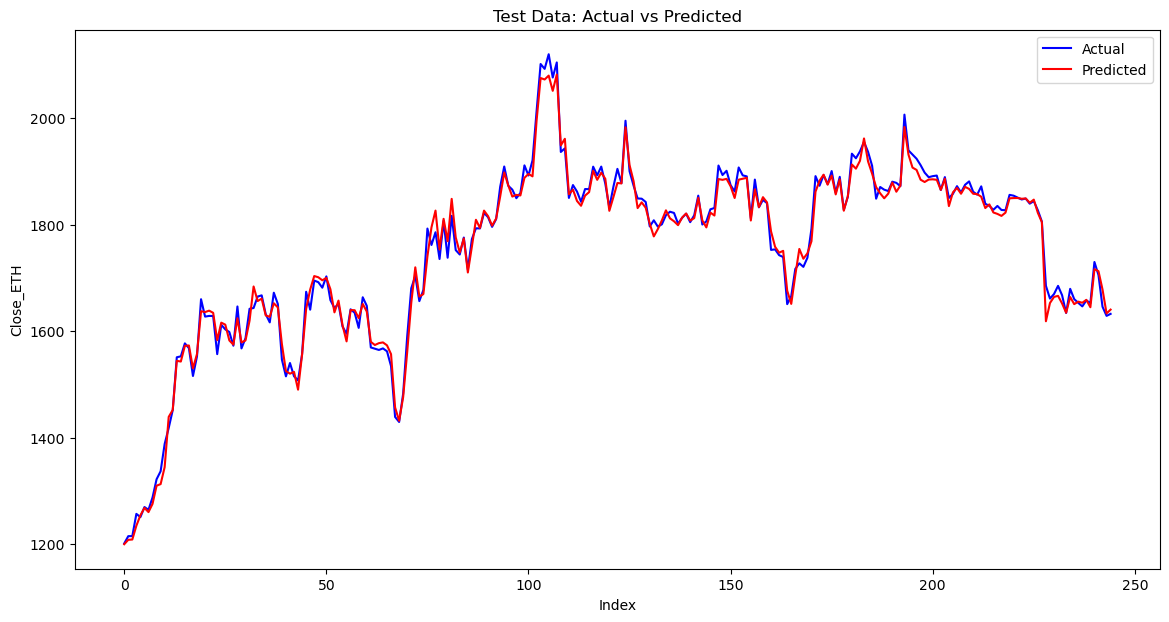

In [21]:
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(14, 7))

# Plotting the actual and predicted values for the test data
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='red')

plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Close_ETH')
plt.legend()

# Show the plot
plt.show()
